This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# 1- 1 추가
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6275 - accuracy: 0.8064 - val_loss: 0.3621 - val_accuracy: 0.8798
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2578 - accuracy: 0.9209 - val_loss: 0.1918 - val_accuracy: 0.9420
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1676 - accuracy: 0.9479 - val_loss: 0.1446 - val_accuracy: 0.9569
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1199 - accuracy: 0.9627 - val_loss: 0.1596 - val_accuracy: 0.9515
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9722 - val_loss: 0.1188 - val_accuracy: 0.9660
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0669 - accuracy: 0.9784 - val_loss: 0.1275 - val_accuracy: 0.9650
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.1337 - val_accuracy: 0.9628
Epoch 

**Plotting a validation accuracy comparison**

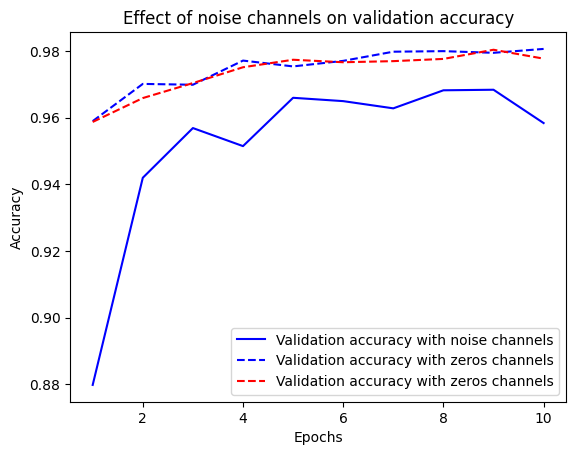

In [12]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"] # 1- 1 추가
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with zeros channels") # 1- 1 추가
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_hyun=model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3159 - accuracy: 0.1032 - val_loss: 2.3072 - val_accuracy: 0.1088
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2996 - accuracy: 0.1187 - val_loss: 2.3084 - val_accuracy: 0.1038
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2915 - accuracy: 0.1282 - val_loss: 2.3173 - val_accuracy: 0.1029
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2794 - accuracy: 0.1379 - val_loss: 2.3241 - val_accuracy: 0.1038
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2643 - accuracy: 0.1527 - val_loss: 2.3293 - val_accuracy: 0.1063
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2432 - accuracy: 0.1676 - val_loss: 2.3450 - val_accuracy: 0.1032
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2194 - accuracy: 0.1824 - val_loss: 2.3670 - val_accuracy: 0.1033

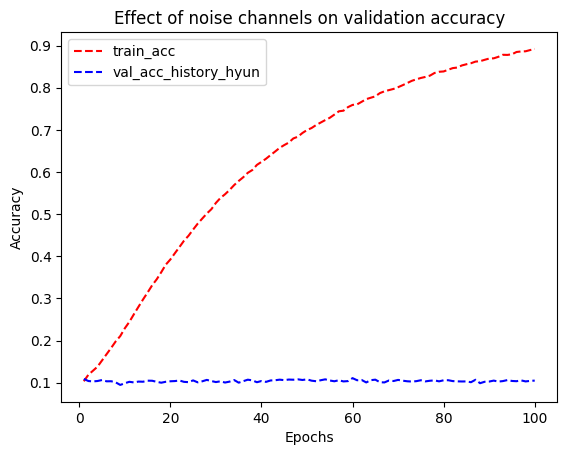

In [22]:
import matplotlib.pyplot as plt
train_acc=history_hyun.history['accuracy']
val_acc_history_hyun= history_hyun.history["val_accuracy"]
epochs = range(1, 101)
plt.plot(epochs, train_acc, "r--",
         label="train_acc")
plt.plot(epochs, val_acc_history_hyun, "b--",
         label="val_acc_history_hyun")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [13]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 597.9506 - accuracy: 0.2935 - val_loss: 2.2984 - val_accuracy: 0.2096
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1459 - accuracy: 0.2083 - val_loss: 2.3493 - val_accuracy: 0.1797
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7389 - accuracy: 0.1793 - val_loss: 2.2665 - val_accuracy: 0.1586
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4280 - accuracy: 0.1857 - val_loss: 2.4902 - val_accuracy: 0.1877
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6432 - accuracy: 0.1936 - val_loss: 2.1561 - val_accuracy: 0.2002
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5017 - accuracy: 0.1982 - val_loss: 2.2911 - val_accuracy: 0.1717
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4002 - accuracy: 0.1860 - val_loss: 2.2889 - val_accuracy: 0.1947
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary